In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import calendar
import scipy.stats

In [291]:
print(os.listdir("../Project"))

['.ipynb_checkpoints', '311_Service_Requests_from_2010_to_Present.csv', 'Amazon - Movies and TV Ratings.csv', 'Amazon Movie Analysis.ipynb', 'AmazonMovie.xlsx', 'Comcast Telecom Operator Complains Analysis.ipynb', 'Comcast_telecom_complaints_data.csv', 'Data science with Python 1', 'MovieAnalysis.ipynb', 'MovieRating.py', 'NYC 311 SR.ipynb', 'Project 2 Solution.docx', 'Project 3 Solution.docx', 'Project 3.ipynb', 'Project 4 Comcast Telecom.docx', 'Project 4-Amazon.ipynb', 'Retail Analysis with Walmart Project 4.docx', 'Solution - Project 3 -User Based recommendation model for Amazon.ipynb', 'Solution 1 - NYC 311 Service Request.ipynb', 'Solution Project 2 - Movielens Case Study.ipynb', 'Test 1.docx', 'Walmart_Store_sales.csv', '~$tail Analysis with Walmart Project 4.docx']


In [2]:
df_NYC=pd.read_csv('../Project/311_Service_Requests_from_2010_to_Present.csv')
df_NYC.head(3)

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"


In [8]:
df_NYC.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [3]:
df_NYC["Created Date"]=pd.to_datetime(df_NYC["Created Date"])
df_NYC["Closed Date"]=pd.to_datetime(df_NYC["Closed Date"])

In [4]:
df_NYC['Request_Closing_Time'] = (df_NYC['Closed Date'] - df_NYC['Created Date'])

In [6]:
df_NYC['City'].fillna('Unknown City',inplace=True)
def camel_case(city):
    try:
        city = city.split(' ')
        city = ' '.join([x.lower().capitalize() for x in city])
        if city == 'Unknown City':
            return np.nan
        else:
            return city
    except:
        return np.nan
df_NYC['City'] = df_NYC['City'].apply(camel_case)

In [11]:
df_NYC['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [284]:
df_NYC.groupby('Status').size().sort_values(ascending=False)

Status
Closed      298471
Open          1439
Assigned       786
Draft            2
dtype: int64

In [25]:
df_NYC["StatusCategory"]=["Closed" if Status=="Closed" else "Open" for Status in df_NYC["Status"]]

In [285]:
df_NYC["Created Year"]=df_NYC["Created Date"].dt.year
df_NYC["Created Month"]=df_NYC["Created Date"].dt.month

In [53]:
df_NYC["Created Month"].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [286]:
df_NYC['Created Month'] = df_NYC['Created Month'].apply(lambda x: calendar.month_abbr[x])

In [287]:
df_NYC["Created Month"].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar'], dtype=object)

In [288]:
df_NYC.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Created Year,Created Month
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15,2015,Dec
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16,2015,Dec
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31,2015,Dec
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14,2015,Dec
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02,2015,Dec


In [309]:
#daily = df_NYC.groupby(pd.Grouper(key='Created Date', freq='D', axis=1), axis=1)['Unique Key'].count()

In [310]:
#a=df_NYC.groupby(pd.Grouper(key='Created Date', freq='D', axis=1))

In [64]:
monthly=daily.groupby(pd.Grouper(freq='M')).mean()
monthly

Created Date
2015-03-31     823.666667
2015-04-30     910.166667
2015-05-31    1175.387097
2015-06-30    1177.166667
2015-07-31    1125.419355
2015-08-31    1127.612903
2015-09-30    1180.900000
2015-10-31    1051.774194
2015-11-30    1025.766667
2015-12-31     984.548387
Freq: M, Name: Unique Key, dtype: float64

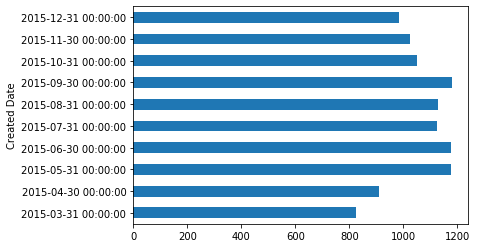

In [71]:
monthly.plot(kind='barh')

In [306]:
df_NYC=df_NYC.set_index(df_NYC["Created Date"])

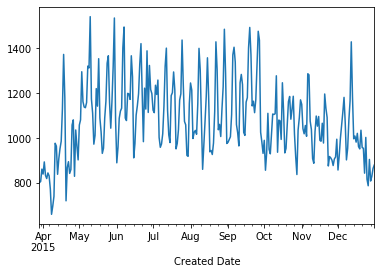

In [83]:
df_NYC.groupby(pd.Grouper(freq="D")).size().plot()

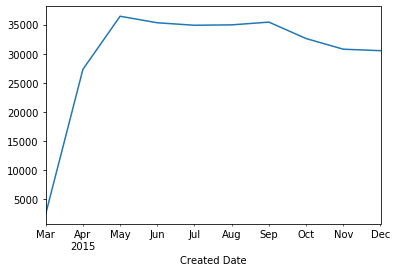

In [84]:
df_NYC.groupby(pd.Grouper(freq="M")).size().plot()

In [96]:
RequestPerCity=df_NYC.groupby('City').size().sort_values(ascending=False)
RequestPerCity.head(10)

City
BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
ASTORIA           6330
FLUSHING          5971
RIDGEWOOD         5163
CORONA            4295
WOODSIDE          3544
dtype: int64

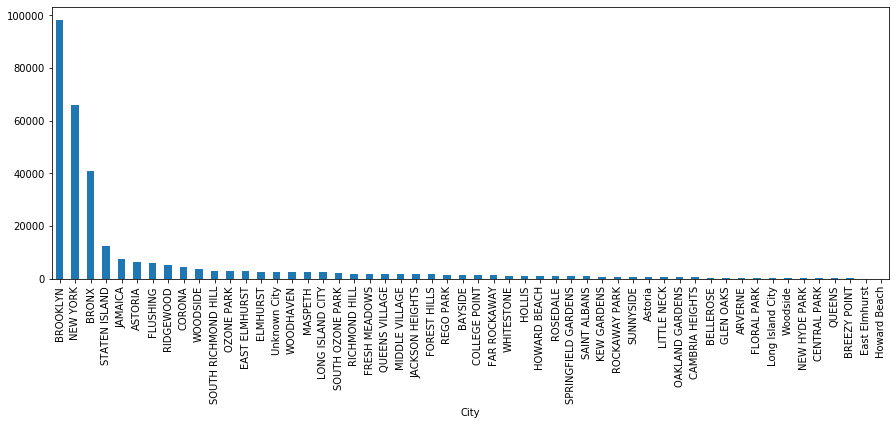

In [97]:
RequestPerCity.plot(kind='bar',figsize=(15,5))

In [127]:
df_NYC['Request_Closing_Time'].fillna(value=df_NYC['Request_Closing_Time'].mean(),inplace=True)

#### Approach One

In [132]:
df_AvgRT=df_NYC[['City','Request_Closing_Time']]
df_AvgRT.dtypes

City                             object
Request_Closing_Time    timedelta64[ns]
dtype: object

In [133]:
#df_AvgRT['Request_Closing_Time'].dt.total_seconds()
df_AvgRT['RCT']=df_AvgRT['Request_Closing_Time'].values.astype(np.int64)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [134]:
df_AvgRT.dtypes

City                             object
Request_Closing_Time    timedelta64[ns]
RCT                               int64
dtype: object

In [141]:
Average=df_AvgRT.groupby('City').mean().sort_values('RCT')

In [143]:
Average.head(5)

,RCT
City,
ARVERNE,8.153736e+12
ROCKAWAY PARK,8.348024e+12
LITTLE NECK,9.279619e+12
OAKLAND GARDENS,9.471189e+12
BAYSIDE,9.645600e+12


#### Approch Two

In [241]:
df_AvgRT=df_NYC[['City','Complaint Type','Request_Closing_Time']]
df_AvgRT.dtypes

City                             object
Complaint Type                   object
Request_Closing_Time    timedelta64[ns]
dtype: object

In [242]:
df_AvgRT['Request_Closing_Time'] = pd.to_datetime(df_AvgRT['Request_Closing_Time']).values.astype(np.int64)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [243]:
df_AvgRT.dtypes

City                    object
Complaint Type          object
Request_Closing_Time     int64
dtype: object

In [244]:
df_AvgRT = df_AvgRT.groupby(['Complaint Type','City'], as_index=False)['Request_Closing_Time'].mean()
df_AvgRT['Avg Request Closing Time'] = pd.to_datetime(df_AvgRT['Request_Closing_Time'], unit='ns').dt.strftime('%H:%M:%S')

In [248]:
df_AvgRT.sort_values('Complaint Type')

,Complaint Type,City,Request_Closing_Time,Avg Request Closing Time
0,Agency Issues,Unknown City,1.893717e+13,05:15:37
26,Animal Abuse,MASPETH,2.620022e+13,07:16:40
27,Animal Abuse,MIDDLE VILLAGE,2.477005e+13,06:52:50
28,Animal Abuse,NEW HYDE PARK,6.926000e+12,01:55:26
29,Animal Abuse,NEW YORK,1.326654e+13,03:41:06
...,...,...,...,...
757,Vending,HOWARD BEACH,6.508400e+12,01:48:28
758,Vending,JACKSON HEIGHTS,1.337256e+13,03:42:52
759,Vending,JAMAICA,2.704240e+13,07:30:42
761,Vending,LONG ISLAND CITY,3.340590e+13,09:16:45


[Text(0, 0, 'NEW YORK'),
 Text(0, 0, 'ASTORIA'),
 Text(0, 0, 'BRONX'),
 Text(0, 0, 'ELMHURST'),
 Text(0, 0, 'BROOKLYN'),
 Text(0, 0, 'KEW GARDENS'),
 Text(0, 0, 'JACKSON HEIGHTS'),
 Text(0, 0, 'MIDDLE VILLAGE'),
 Text(0, 0, 'REGO PARK'),
 Text(0, 0, 'SAINT ALBANS'),
 Text(0, 0, 'JAMAICA'),
 Text(0, 0, 'SOUTH RICHMOND HILL'),
 Text(0, 0, 'Unknown City'),
 Text(0, 0, 'RIDGEWOOD'),
 Text(0, 0, 'HOWARD BEACH'),
 Text(0, 0, 'FOREST HILLS'),
 Text(0, 0, 'STATEN ISLAND'),
 Text(0, 0, 'OZONE PARK'),
 Text(0, 0, 'RICHMOND HILL'),
 Text(0, 0, 'WOODHAVEN'),
 Text(0, 0, 'FLUSHING'),
 Text(0, 0, 'CORONA'),
 Text(0, 0, 'QUEENS VILLAGE'),
 Text(0, 0, 'OAKLAND GARDENS'),
 Text(0, 0, 'HOLLIS'),
 Text(0, 0, 'MASPETH'),
 Text(0, 0, 'EAST ELMHURST'),
 Text(0, 0, 'SOUTH OZONE PARK'),
 Text(0, 0, 'WOODSIDE'),
 Text(0, 0, 'FRESH MEADOWS'),
 Text(0, 0, 'LONG ISLAND CITY'),
 Text(0, 0, 'ROCKAWAY PARK'),
 Text(0, 0, 'SPRINGFIELD GARDENS'),
 Text(0, 0, 'COLLEGE POINT'),
 Text(0, 0, 'BAYSIDE'),
 Text(0, 0, 'GLEN 

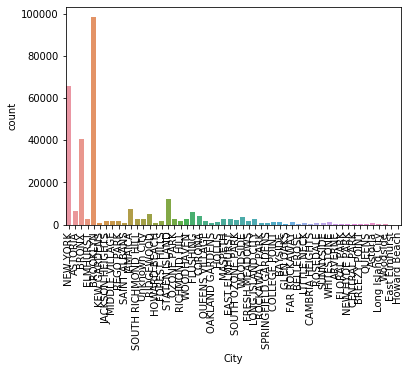

In [180]:
#Complaints per City
plot1=sns.countplot(df_NYC['City'])
plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)

[Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(0, 0, 'Blocked Driveway'),
 Text(0, 0, 'Illegal Parking'),
 Text(0, 0, 'Derelict Vehicle'),
 Text(0, 0, 'Noise - Commercial'),
 Text(0, 0, 'Noise - House of Worship'),
 Text(0, 0, 'Posting Advertisement'),
 Text(0, 0, 'Noise - Vehicle'),
 Text(0, 0, 'Animal Abuse'),
 Text(0, 0, 'Vending'),
 Text(0, 0, 'Traffic'),
 Text(0, 0, 'Drinking'),
 Text(0, 0, 'Bike/Roller/Skate Chronic'),
 Text(0, 0, 'Panhandling'),
 Text(0, 0, 'Noise - Park'),
 Text(0, 0, 'Homeless Encampment'),
 Text(0, 0, 'Urinating in Public'),
 Text(0, 0, 'Graffiti'),
 Text(0, 0, 'Disorderly Youth'),
 Text(0, 0, 'Illegal Fireworks'),
 Text(0, 0, 'Ferry Complaint'),
 Text(0, 0, 'Agency Issues'),
 Text(0, 0, 'Squeegee'),
 Text(0, 0, 'Animal in a Park')]

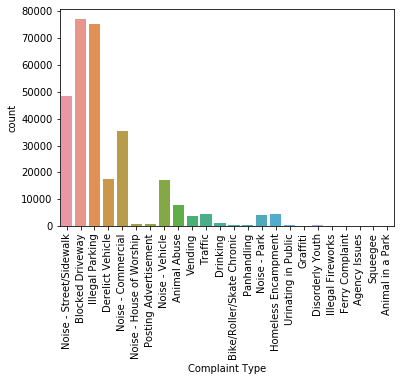

In [187]:
#Complaint Types per City
plot2=sns.countplot(df_NYC['Complaint Type'])
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=90)

In [195]:
complaint=df_NYC['Complaint Type'].value_counts().nlargest(5)
complaint

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

[Text(0, 0, 'Blocked Driveway'),
 Text(0, 0, 'Illegal Parking'),
 Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(0, 0, 'Noise - Commercial'),
 Text(0, 0, 'Derelict Vehicle')]

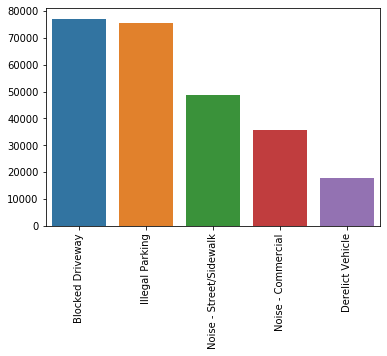

In [196]:
plot3=sns.barplot(x=complaint.index,y=complaint.values)
plot3.set_xticklabels(plot3.get_xticklabels(),rotation=90)

In [198]:
Type=df_NYC['Location Type'].value_counts().nlargest(5)
Type

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
Name: Location Type, dtype: int64

[Text(0, 0, 'Street/Sidewalk'),
 Text(0, 0, 'Store/Commercial'),
 Text(0, 0, 'Club/Bar/Restaurant'),
 Text(0, 0, 'Residential Building/House'),
 Text(0, 0, 'Park/Playground')]

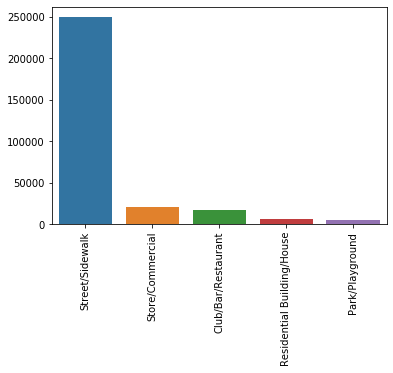

In [199]:
plot4=sns.barplot(x=Type.index,y=Type.values)
plot4.set_xticklabels(plot4.get_xticklabels(),rotation=90)

In [13]:
df2=df_NYC[['City','Complaint Type']]

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 2 columns):
City              298084 non-null object
Complaint Type    300698 non-null object
dtypes: object(2)
memory usage: 4.6+ MB


In [20]:
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import chi2

### Are the type of complaint or service requested and location related?

In [16]:
contingency_table=pd.crosstab(df2["City"],df2["Complaint Type"])

In [17]:
contingency_table

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
Arverne,38,0,0,35,27,2,1,1,4,0,...,11,2,29,7,1,0,0,0,1,1
Astoria,125,0,15,2734,363,3,35,4,32,4,...,19,61,500,204,1,1,0,47,9,54
Bayside,37,0,0,377,198,1,1,3,2,0,...,2,4,15,16,0,0,0,9,0,2
Bellerose,7,0,1,95,89,2,1,0,1,1,...,1,1,13,10,1,1,0,7,1,0
Breezy Point,2,0,0,3,3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
Bronx,1415,0,20,12755,1953,63,188,9,247,24,...,79,547,8892,3396,19,17,0,355,51,379
Brooklyn,2394,0,111,28148,5181,72,257,43,857,61,...,340,1555,13356,5177,49,45,0,1085,136,515
Cambria Heights,11,0,0,147,115,0,0,0,5,1,...,2,0,25,77,0,0,0,6,0,0
Central Park,0,0,0,0,0,0,0,0,0,0,...,0,0,95,0,0,0,0,0,0,0


In [18]:
#Observed Values
Observed_Values = contingency_table.values 
Observed_Values

array([[ 38,   0,   0, ...,   0,   1,   1],
       [125,   0,  15, ...,  47,   9,  54],
       [ 37,   0,   0, ...,   9,   0,   2],
       ...,
       [ 28,   0,   4, ...,  17,   0,   1],
       [ 45,   0,   2, ...,   6,   2,   6],
       [ 69,   0,   4, ...,  39,   8,  15]], dtype=int64)

In [41]:
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]

In [42]:
Expected_Values

array([[5.73241100e+00, 7.38046993e-04, 3.11455831e-01, ...,
        3.31752124e+00, 4.36923820e-01, 2.80088834e+00],
       [1.83619547e+02, 2.36409871e-02, 9.97649656e+00, ...,
        1.06266237e+02, 1.39954644e+01, 8.97175461e+01],
       [3.18148810e+01, 4.09616081e-03, 1.72857986e+00, ...,
        1.84122429e+01, 2.42492720e+00, 1.55449303e+01],
       ...,
       [2.86099422e+01, 3.68352545e-03, 1.55444774e+00, ...,
        1.65574469e+01, 2.18064707e+00, 1.39789791e+01],
       [6.42030032e+01, 8.26612633e-03, 3.48830531e+00, ...,
        3.71562378e+01, 4.89354679e+00, 3.13699494e+01],
       [9.54706995e+01, 1.22918372e-02, 5.18715530e+00, ...,
        5.52518082e+01, 7.27676762e+00, 4.66475222e+01]])

In [35]:
contingency_table.iloc[0,0:22]

Complaint Type
Animal Abuse                 38
Animal in a Park              0
Bike/Roller/Skate Chronic     0
Blocked Driveway             35
Derelict Vehicle             27
Disorderly Youth              2
Drinking                      1
Graffiti                      1
Homeless Encampment           4
Illegal Fireworks             0
Illegal Parking              58
Noise - Commercial            2
Noise - House of Worship     11
Noise - Park                  2
Noise - Street/Sidewalk      29
Noise - Vehicle               7
Panhandling                   1
Posting Advertisement         0
Squeegee                      0
Traffic                       0
Urinating in Public           1
Vending                       1
Name: Arverne, dtype: int64

In [31]:
len(contingency_table.iloc[0:48,0])

48

In [43]:
alpha = 0.05
no_of_rows=len(contingency_table.iloc[0:48,0])
no_of_columns=len(contingency_table.iloc[0,0:22])
ddof=(no_of_rows-1)*(no_of_columns-1)

In [44]:
##Degrees of Freedom
ddof

987

In [45]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 10155.901056149927


In [47]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 1061.199627302167


In [48]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  987
chi-square statistic: 10155.901056149927
critical_value: 1061.199627302167
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


#### Yes, The type of complaint or service requested and location related

#### Whether the average response time across complaint types is similar or not (overall)

In [49]:
df3=df_NYC[['Complaint Type','Request_Closing_Time']]

In [260]:
df3['Request_Closing_Time'] = pd.to_datetime(df3['Request_Closing_Time']).values.astype(np.int64)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [269]:
df3 = df3.groupby(['Complaint Type'], as_index=False)['Request_Closing_Time'].mean()

In [270]:
df3.dtypes

Complaint Type           object
Request_Closing_Time    float64
dtype: object

In [272]:
contingency_table=pd.crosstab(df3["Complaint Type"],df3["Request_Closing_Time"])

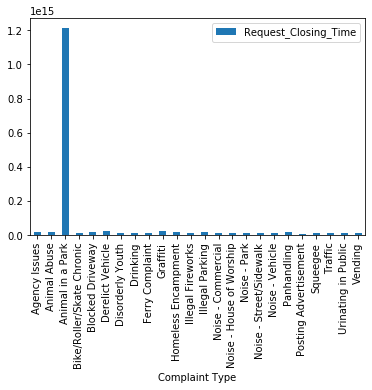

In [281]:
df3.plot.bar(x='Complaint Type', y='Request_Closing_Time', rot=90)

In [277]:
#Observed Values
Observed_Values = contingency_table.values 
Observed_Values
#Expected Values
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]

alpha = 0.05
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)

chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

chi-square statistic:- 46.00000000000003
critical_value: 3.841458820694124
p-value: 1.182531850218993e-11
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 46.00000000000003
critical_value: 3.841458820694124
p-value: 1.182531850218993e-11
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
